# Análise da Vacinação no Recife

In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv('vacinados - 24 de dezembro.csv', sep= ';', encoding = 'utf-8')

In [3]:
raw_data.head()

,cpf,nome,sexo,grupo,vacina,lote,dose,data_vacinacao,local_vacinacao
0,***.574.544-**,AABAN VASCONCELOS ZYZZYAG,MASCULINO,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),216VCD206Z,1.0,2021-07-26,DRIVE THRU PARQUE DE EXPOSIÇÃO
1,***.574.544-**,AABAN VASCONCELOS ZYZZYAG,MASCULINO,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),219VCD270W,2.0,2021-10-19,DRIVE THRU PARQUE DE EXPOSIÇÃO
2,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,3 - COMIRNATY (PFIZER),32010BD,3.0,2021-10-07,CENTRO DE VACINAÇÃO UNINASSAU
3,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210016,1.0,2021-02-11,CENTRO DE VACINAÇÃO COMPAZ MIGUEL ARRAES
4,***.886.964-**,AAMANDA MARIA FREIRE DA SILVA,FEMININO,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),210043,2.0,2021-03-04,CENTRO DE VACINAÇÃO PARQUE DE EXPOSIÇÃO


# Tratamento de Dados

### Filtrando as colunas que serão usadas:

In [4]:
raw_data.columns

Index(['cpf', 'nome', 'sexo', 'grupo', 'vacina', 'lote', 'dose',
       'data_vacinacao', 'local_vacinacao'],
      dtype='object')

In [5]:
data = raw_data.loc[:, ['cpf', 'grupo', 'vacina', 'dose', 'data_vacinacao']]
data.head(5)

,cpf,grupo,vacina,dose,data_vacinacao
0,***.574.544-**,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),1.0,2021-07-26
1,***.574.544-**,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ),2.0,2021-10-19
2,***.886.964-**,TRABALHADORES DA SAÚDE,3 - COMIRNATY (PFIZER),3.0,2021-10-07
3,***.886.964-**,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),1.0,2021-02-11
4,***.886.964-**,TRABALHADORES DA SAÚDE,1 - CORONAVAC - SINOVAC (BUTANTAN),2.0,2021-03-04


### Renomeando as vacinas para tornar mais fácil o uso:

In [6]:
data['vacina'].unique()

array(['2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)',
       '3 - COMIRNATY (PFIZER)', '1 - CORONAVAC - SINOVAC (BUTANTAN)',
       '4 - JANSSEN COVID-19 VACCINE (JOHNSON & JOHNSON)', nan],
      dtype=object)

In [7]:
data['vacina'] = data['vacina'].replace(['1 - CORONAVAC - SINOVAC (BUTANTAN)',
                                         '1- CORONAVAC - SINOVAC (BUTANTAN)'],
                                        
                                        'CORONAVAC')

In [8]:
data['vacina'] = data['vacina'].replace(['2 - CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)',
                                         ' CHADOX1NCOV-19 - OXFORD/ASTRAZENECA (FIOCRUZ)'],
                                        
                                        'CHADOX1NCOV-19')

In [9]:
data['vacina'] = data['vacina'].replace(['3 - COMIRNATY (PFIZER)'], 'COMIRNATY')

In [10]:
data['vacina'] = data['vacina'].replace(['4 - JANSSEN COVID-19 VACCINE (JOHNSON & JOHNSON)'], 'JANSSEN')

In [11]:
data['vacina'].unique()

array(['CHADOX1NCOV-19', 'COMIRNATY', 'CORONAVAC', 'JANSSEN', nan],
      dtype=object)

### Existem aplicações de vacinas onde os dados foram perdidos (vacinas dos tipo *NaN*).

In [12]:
# dropping all missing values
data.dropna(inplace= True)

In [13]:
data['vacina'].unique()

array(['CHADOX1NCOV-19', 'COMIRNATY', 'CORONAVAC', 'JANSSEN'],
      dtype=object)

### Renomeando os grupos para tornar mais fácil o uso:

In [14]:
data['grupo'].unique()

array(['TRABALHADORES INDUSTRIAIS E BANCÁRIOS', 'TRABALHADORES DA SAÚDE',
       ' PÚBLICO EM GERAL - MENOR DE 18 ANOS',
       'PÚBLICO EM GERAL (18 a 59 anos)', 'IDOSOS',
       'TRABALHADORES DA EDUCAÇÃO', 'PESSOAS COM COMORBIDADES',
       'PÚBLICO EM GERAL - MENOR DE 18 ANOS', 'OUTRAS PRIORIDADES',
       'CAMINHONEIROS', 'SESAU - BUSCA ATIVA',
       'TRABALHADORES DE TRANSPORTE COLETIVO RODOVIÁRIO',
       'TRABALHADORES DE TRANSPORTE AÉREO', 'TRABALHADORES PORTUÁRIOS',
       'TRABALHADORES DA LIMPEZA URBANA', 'PESSOAS EM SITUAÇÃO DE RUA',
       'GESTANTES E PUÉRPERAS',
       'TRABALHADORES DE TRANSPORTE METROVIÁRIO E FERROVIÁRIO',
       'TRABALHADORES DA ASSISTÊNCIA SOCIAL',
       'PESSOAS COM DEFICIÊNCIA - 12 A 17 ANOS',
       'GESTANTES E PUÉRPERAS NÃO RESIDENTES EM RECIFE',
       'PESSOAS COM VIAGEM PARA EXTERIOR (ESTUDO/PESQUISA/TRABALHO/TRATAMENTO DE SAÚDE)',
       'GESTANTES E PUÉRPERAS - 12 A 17 ANOS',
       'PESSOAS COM COMORBIDADES - 12 A 17 ANOS',
       'TRA

In [15]:
data['grupo'] = data['grupo'].replace(' PÚBLICO EM GERAL - MENOR DE 18 ANOS',
                                      'PÚBLICO EM GERAL - MENOR DE 18 ANOS')

In [16]:
data['grupo'] = data['grupo'].replace(['PESSOAS COM COMORBIDADES', 'PESSOAS COM COMORBIDADES - 12 A 17 ANOS'],
                                      
                                      'COMORBIDADES')

In [17]:
data['grupo'].unique()

array(['TRABALHADORES INDUSTRIAIS E BANCÁRIOS', 'TRABALHADORES DA SAÚDE',
       'PÚBLICO EM GERAL - MENOR DE 18 ANOS',
       'PÚBLICO EM GERAL (18 a 59 anos)', 'IDOSOS',
       'TRABALHADORES DA EDUCAÇÃO', 'COMORBIDADES', 'OUTRAS PRIORIDADES',
       'CAMINHONEIROS', 'SESAU - BUSCA ATIVA',
       'TRABALHADORES DE TRANSPORTE COLETIVO RODOVIÁRIO',
       'TRABALHADORES DE TRANSPORTE AÉREO', 'TRABALHADORES PORTUÁRIOS',
       'TRABALHADORES DA LIMPEZA URBANA', 'PESSOAS EM SITUAÇÃO DE RUA',
       'GESTANTES E PUÉRPERAS',
       'TRABALHADORES DE TRANSPORTE METROVIÁRIO E FERROVIÁRIO',
       'TRABALHADORES DA ASSISTÊNCIA SOCIAL',
       'PESSOAS COM DEFICIÊNCIA - 12 A 17 ANOS',
       'GESTANTES E PUÉRPERAS NÃO RESIDENTES EM RECIFE',
       'PESSOAS COM VIAGEM PARA EXTERIOR (ESTUDO/PESQUISA/TRABALHO/TRATAMENTO DE SAÚDE)',
       'GESTANTES E PUÉRPERAS - 12 A 17 ANOS',
       'TRABALHADORES DE TRANSPORTE AQUAVIÁRIO'], dtype=object)

In [18]:
data.head()

,cpf,grupo,vacina,dose,data_vacinacao
0,***.574.544-**,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,CHADOX1NCOV-19,1.0,2021-07-26
1,***.574.544-**,TRABALHADORES INDUSTRIAIS E BANCÁRIOS,CHADOX1NCOV-19,2.0,2021-10-19
2,***.886.964-**,TRABALHADORES DA SAÚDE,COMIRNATY,3.0,2021-10-07
3,***.886.964-**,TRABALHADORES DA SAÚDE,CORONAVAC,1.0,2021-02-11
4,***.886.964-**,TRABALHADORES DA SAÚDE,CORONAVAC,2.0,2021-03-04


# Estatística Descritiva da Vacinação

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histograma com a proporção das doses aplicadas:

In [20]:
doses_proportion = data['dose'].value_counts(normalize= True).reset_index()
doses_proportion.columns = ['dose', 'proporção']
doses_proportion

,dose,proporção
0,1.0,0.481352
1,2.0,0.417228
2,3.0,0.101420


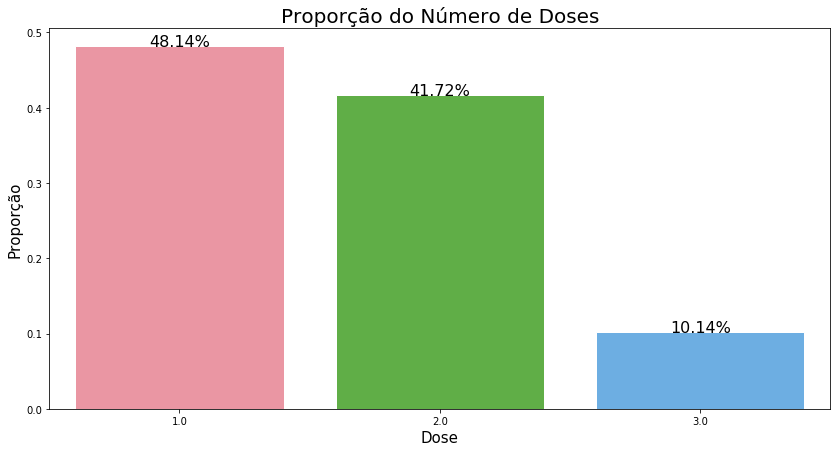

In [21]:
# figure config
fig, ax = plt.subplots(figsize= (14, 7))
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('husl', 2))

sns.barplot(x= 'dose', y= 'proporção', data= doses_proportion, ax= ax)

plt.title('Proporção do Número de Doses', fontsize= 20)
plt.xlabel('Dose', fontsize= 15)
plt.ylabel('Proporção', fontsize= 15)

# percentages at the top of histograms
for index, row in doses_proportion.iterrows():
    ax.text(index, row['proporção'], "{:.2%}".format(row['proporção']), color= 'black', ha= "center", fontsize= 16)

plt.show()

### Possível interpretação: tomando como contraste a análise do dia 19 de Maio, podemos ver que a quantidade de segundas doses aumentou, o que contribuiu para a diminuição da taxa de mortes no país. Além disso, foi adotado o uso de uma dose extra para determinadas vacinas.

In [22]:
doses_frequency = data["dose"].value_counts().reset_index()
doses_frequency.columns = ["dose", "frequência"]
doses_frequency.head()

,dose,frequência
0,1.0,1429281
1,2.0,1238878
2,3.0,301148


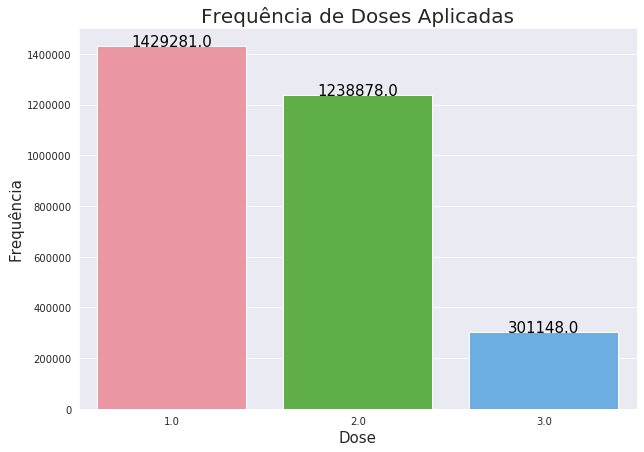

In [23]:
fig, axis = plt.subplots(figsize = (10, 7))
sns.set_style("darkgrid")
sns.set_palette(sns.color_palette("pastel", 2))

sns.barplot(x = "dose", y = "frequência", data = doses_frequency, ax = axis)

plt.title("Frequência de Doses Aplicadas", fontsize = 20)
plt.xlabel("Dose", fontsize = 15)
plt.ylabel("Frequência", fontsize = 15)

for index, row in doses_frequency.iterrows():
    axis.text(index, row["frequência"], "{}".format(row["frequência"]), color = "black", ha = "center", fontsize = 15)

plt.show()

### Valores absolutos das doses aplicadas até hoje (24/12/2021).

### Histograma com a proporção das vacinas usadas:

In [24]:
vaccines_proportion = data['vacina'].value_counts(normalize= True).reset_index()
vaccines_proportion.columns = ['vacina', 'proporção']
vaccines_proportion

,vacina,proporção
0,COMIRNATY,0.373231
1,CHADOX1NCOV-19,0.346484
2,CORONAVAC,0.255734
3,JANSSEN,0.024551


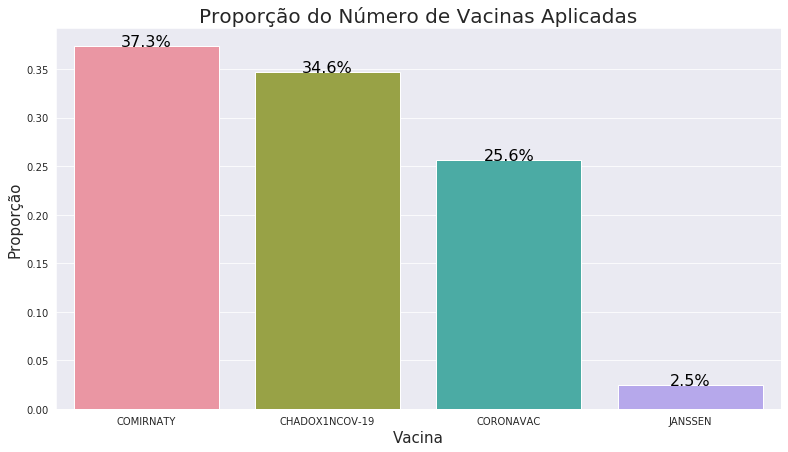

In [25]:
fig, ax = plt.subplots(figsize=(13, 7)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('pastel', 3))

sns.barplot(x= 'vacina', y= 'proporção', data= vaccines_proportion, ax= ax)

plt.title('Proporção do Número de Vacinas Aplicadas', fontsize= 20)
plt.xlabel('Vacina', fontsize= 15)
plt.ylabel('Proporção', fontsize= 15)

for index, row in vaccines_proportion.iterrows():
    ax.text(index, row['proporção'], "{:.1%}".format(row['proporção']), color= 'black', ha= "center", fontsize= 16)

plt.show()

In [26]:
data["vacina"].value_counts()["COMIRNATY"]

1108238

## Possível interpretação: visando aumentar a taxa de vacinação do país, o Governo investiu na compra de vacinas, em especial na Comirnaty/Pfizer.

### Histograma com a proporção dos grupos vacinados:

In [27]:
groups_proportion = data['grupo'].value_counts(normalize= True).reset_index()
groups_proportion.columns = ['grupo', 'proporção']

# groups absolutes are not equally spread, so lets check out the top 4
groups_proportion = groups_proportion.nlargest(4, 'proporção')

groups_proportion

,grupo,proporção
0,PÚBLICO EM GERAL (18 a 59 anos),0.460329
1,IDOSOS,0.252156
2,TRABALHADORES DA SAÚDE,0.097311
3,PÚBLICO EM GERAL - MENOR DE 18 ANOS,0.063848


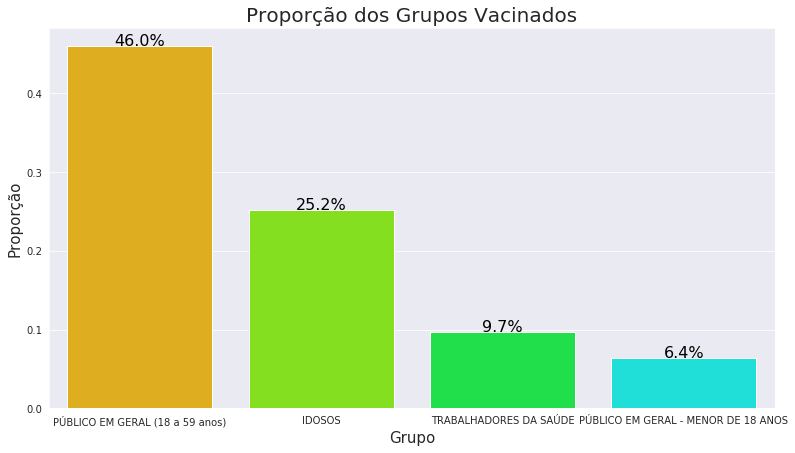

In [28]:
fig, ax = plt.subplots(figsize=(13, 7)) 
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette('hsv', 7))

sns.barplot(x= 'grupo', y= 'proporção', data= groups_proportion, ax= ax)

plt.title('Proporção dos Grupos Vacinados', fontsize= 20)
plt.xlabel('Grupo', fontsize= 15)
plt.ylabel('Proporção', fontsize= 15)

for index, row in groups_proportion.iterrows():
    ax.text(index, row['proporção'], "{:.1%}".format(row['proporção']), color= 'black', ha= "center", fontsize= 16)

plt.show()

## Possível interpretação: após finalmente o Governo adquirir um plano de vacinação mais extenso, foi possível que o público em geral, maioria no país, entrasse na fila de vacinação.

# *Análise por Agrupamento*

### Vacina mais usada em cada grupo:

In [29]:
data.groupby('grupo').apply(lambda df: df['vacina'].value_counts().idxmax())

grupo
CAMINHONEIROS                                                                      CHADOX1NCOV-19
COMORBIDADES                                                                            COMIRNATY
GESTANTES E PUÉRPERAS                                                                   COMIRNATY
GESTANTES E PUÉRPERAS - 12 A 17 ANOS                                                    COMIRNATY
GESTANTES E PUÉRPERAS NÃO RESIDENTES EM RECIFE                                          COMIRNATY
IDOSOS                                                                                  CORONAVAC
OUTRAS PRIORIDADES                                                                      COMIRNATY
PESSOAS COM DEFICIÊNCIA - 12 A 17 ANOS                                                  COMIRNATY
PESSOAS COM VIAGEM PARA EXTERIOR (ESTUDO/PESQUISA/TRABALHO/TRATAMENTO DE SAÚDE)           JANSSEN
PESSOAS EM SITUAÇÃO DE RUA                                                                JANSSEN
PÚBLICO EM GER

### Média de doses tomadas em cada grupo:

In [30]:
data.groupby('grupo').apply(lambda df: df['dose'].mean())

grupo
CAMINHONEIROS                                                                      1.477648
COMORBIDADES                                                                       1.673573
GESTANTES E PUÉRPERAS                                                              1.465257
GESTANTES E PUÉRPERAS - 12 A 17 ANOS                                               1.351449
GESTANTES E PUÉRPERAS NÃO RESIDENTES EM RECIFE                                     1.323024
IDOSOS                                                                             1.856156
OUTRAS PRIORIDADES                                                                 1.546093
PESSOAS COM DEFICIÊNCIA - 12 A 17 ANOS                                             1.444252
PESSOAS COM VIAGEM PARA EXTERIOR (ESTUDO/PESQUISA/TRABALHO/TRATAMENTO DE SAÚDE)    1.428999
PESSOAS EM SITUAÇÃO DE RUA                                                         1.271744
PÚBLICO EM GERAL (18 a 59 anos)                                           

### Quantidade de cada tipo de vacina aplicada em cada grupo:

In [31]:
data.groupby(['grupo', 'vacina']).size()

grupo                                  vacina        
CAMINHONEIROS                          CHADOX1NCOV-19     7842
                                       COMIRNATY          1496
                                       CORONAVAC           484
                                       JANSSEN             893
COMORBIDADES                           CHADOX1NCOV-19    67098
                                                         ...  
TRABALHADORES INDUSTRIAIS E BANCÁRIOS  JANSSEN            1757
TRABALHADORES PORTUÁRIOS               CHADOX1NCOV-19     1758
                                       COMIRNATY           247
                                       CORONAVAC            54
                                       JANSSEN              50
Length: 86, dtype: int64